In [30]:
root_path = '/home/drl/PycharmProjects/rl_baselines/pytorch-a2c-ppo-acktr'
import os 
os.chdir(root_path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from utils import IO
from utils.Logger import LoggerCsv
from eval.plot_results import *

 v_e = eval_data_df.loc[:, '1':'6'].values

c_command = eval_data_df.loc[:, '7':'9'].values

xyz = eval_data_df.loc[:, '10':'12'].values

In [31]:
#GA_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/GA_straight_line'

exp_id = 23
 
RL_data_path = 'eval/results_any/F5_contact_phase/originals'
save_fig_path = 'eval/results_any/F5_contact_phase'
command_list = [50,75,100,125,150,175,200]
 
 
max_step = 2000
dt = 0.01
exp_data_path = os.path.join(RL_data_path, 'No23')
exp_dir_list = os.listdir(exp_data_path)
exp_dir_list

['log_contact_cons150.pkl',
 'log_contact_cons200.pkl',
 'log_contact_cons75.pkl',
 'log_contact_cons100.pkl',
 'log_contact_cons50.pkl',
 'log_contact_cons175.pkl',
 'log_contact_cons5.pkl']

In [32]:
robot_contact_list ={
     'LF':[20,21,22, 23,24,25], #'LF'
    'LH':[38,39,40,41,42,43],#'LH'
    'RF':[56,57,58,59,60,61,], #'RF'
   'RH':[74,75,76,77,78,79] # 'RH'
}

def get_LegIndex(step):
    c_info = contact_infos[step]
    c_pos = np.zeros(4)
    for i in range(len(c_info)):
        if c_info[i] in robot_contact_list['LF']:
            c_pos[0] =1
        elif c_info[i] in robot_contact_list['LH']:
            c_pos[1] =1

        elif c_info[i] in robot_contact_list['RF']:
            c_pos[2] =1
        elif c_info[i] in robot_contact_list['RH']:
            c_pos[3] =1

    #print(c_pos)
    return c_pos

In [33]:
exp_id = 2

contact_infos = IO(os.path.join(exp_data_path,exp_dir_list[exp_id] )).read_pickle()   

n = len(contact_infos)
contact_nums =[]
contact_pos = []

for step in range(n):
    c_n = len(contact_infos[step])
    contact_nums.append(c_n)
    
    contact_pos.append(get_LegIndex(step))

contact_pos = np.array(contact_pos)
contact_nums = np.array(contact_nums)
contact_pos.shape



(2000, 4)

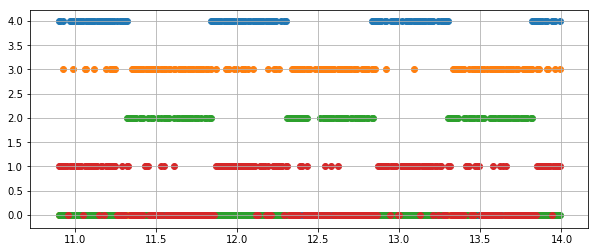

In [34]:
plt.figure(figsize=(10,4))
contact_data = contact_pos *(np.array([4,3,2,1]))
start = 1090
max_step = 1400
t =  np.arange(start *0.01, max_step * 0.01, 0.01)
plt.scatter(t, contact_data[start:max_step,0])
plt.scatter(t, contact_data[start:max_step,1])
plt.scatter(t, contact_data[start:max_step,2])
plt.scatter(t, contact_data[start:max_step,3])

plt.grid()

In [35]:
#get_data_fig 

least_length = 1

segment_list = {}

LF_data = contact_data[start:max_step,3]

con_data = LF_data
new = 1
cur_pos = 0
last_value = 0
for i in range(con_data.shape[0]):
 
    if con_data[i] >0:
        if last_value == 0:
            new =1
            cur_pos +=1
            segment_list[cur_pos] =[i, 1]
            
        elif last_value >0:
            new = 0
            segment_list[cur_pos][1] += 1
        else:
            raise Exception('unexpected!')
     
        
    last_value = con_data[i]
            

 

In [68]:
LF_data

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [69]:
segment_list

{1: [0, 8],
 2: [9, 2],
 3: [13, 4],
 4: [18, 19],
 5: [38, 2],
 6: [41, 2],
 7: [47, 1],
 8: [58, 1],
 9: [99, 9],
 10: [109, 22],
 11: [133, 3],
 12: [137, 4],
 13: [144, 3],
 14: [162, 1],
 15: [198, 9],
 16: [209, 28],
 17: [238, 3],
 18: [243, 3],
 19: [264, 2],
 20: [296, 13]}

In [ ]:
segment_dealed_list={}
for i in range(2, len(segment_list)+1):
    print(i)
    blank_length = segment_list[i][0] - (segment_list[i-1][0]+segment_list[i-1][1])
    if  blank_length < 3:
        
        segment_list[i-1][1] += (segment_list[i][1] +blank_length)
        
        segment_list.pop(i)

In [70]:
segment_list.values()

dict_values([[0, 8], [9, 2], [13, 4], [18, 19], [38, 2], [41, 2], [47, 1], [58, 1], [99, 9], [109, 22], [133, 3], [137, 4], [144, 3], [162, 1], [198, 9], [209, 28], [238, 3], [243, 3], [264, 2], [296, 13]])

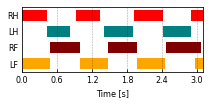

In [38]:

figsize = 8,3
time_duation = 3.1
high_each = 5
 
lf_t = [[0, 43], [92, 41], [192,  49], [289,21]]
rf_t =  [[42,  40], [140,  51], [241, 48]]
lh_t = [[48,  51],[148,  49],[247,  60]]
rh_t = [[0,  48],  [99,  48],   [198,  48],  [296, 14]]

def step2time(a):
    return (np.array(a)*0.01).tolist()
lf_t = step2time(lf_t)
rf_t = step2time(rf_t)
lh_t = step2time(lh_t)
rh_t = step2time(rh_t)

plt.rcParams['xtick.direction'] = 'in' 
plt.rcParams['ytick.direction'] = 'in' 

fig, ax = plt.subplots(figsize = figsize)
high_each =5
d=2
ax.broken_barh( lf_t,  (3*high_each+4*d, high_each), facecolors='red')
ax.broken_barh( rf_t, (2*high_each+3*d, high_each), facecolors='teal')
ax.broken_barh( lh_t, (high_each+2*d, high_each), facecolors='maroon')
ax.broken_barh( rh_t, (d, high_each), facecolors='orange')

 
# 创建两条线，并添加
from matplotlib.lines import Line2D
line1 = [(0.6, 1), (0.6, 29)]
line2 = [(1.2, 1), (1.2, 29)]
line3 = [(1.8, 1), (1.8, 29)]
line4 = [(2.4, 1), (2.4, 29)]
line5 = [(3.0, 1), (3.0, 29)]
(line1_xs, line1_ys) = zip(*line1)
(line2_xs, line2_ys) = zip(*line2)
(line3_xs, line3_ys) = zip(*line3)
(line4_xs, line4_ys) = zip(*line4)
(line5_xs, line5_ys) = zip(*line5)

ax.add_line(Line2D(line1_xs, line1_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))
ax.add_line(Line2D(line2_xs, line2_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))
ax.add_line(Line2D(line3_xs, line3_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))
ax.add_line(Line2D(line4_xs, line4_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))
ax.add_line(Line2D(line5_xs, line5_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))


# 字体设置
font1 = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 8,
}

# 设置刻度线，本例子中设置为0
for line in ax.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(5)
    line.set_markeredgewidth(0)
    
# 设置坐标标注、刻度
ax.set_xlabel('Time [s]', font1)
ax.set_xticks( np.arange(0 ,time_duation, 0.6)  )

ax.set_yticks([d+high_each/2.0,high_each+2*d+high_each/2.0, 2*high_each+3*d+ high_each/2.0, 3*high_each+4*d +high_each/2.0])
ax.set_yticklabels(["LF", "RF",'LH','RH'])
ax.tick_params(labelsize=8)


ax.set_xlim([0, time_duation])


fig.set_size_inches(8.5/2.54 ,8.5/2.54* (1/2.5))
fig.subplots_adjust(left=0.15, bottom = 0.2)
plt.savefig(save_fig_path+'/contact_phase.svg', dpi=600,  pad_inches=0 )
plt.show()


In [77]:
a = [[0,  48],  [99,  48],   [198,  48],  [296, 13]]




[[0.0, 0.48], [0.99, 0.48], [1.98, 0.48], [2.96, 0.13]]

## Summary

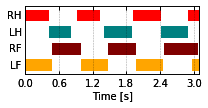

In [26]:
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(axisartist.Subplot(fig, "111"))
 
high_each =5
d=2
ax.broken_barh( lf_t,  (3*high_each+4*d, high_each), facecolors='red')
ax.broken_barh( rf_t, (2*high_each+3*d, high_each), facecolors='teal')
ax.broken_barh( lh_t, (high_each+2*d, high_each), facecolors='maroon')
ax.broken_barh( rh_t, (d, high_each), facecolors='orange')


# 创建两条线，并添加
from matplotlib.lines import Line2D
line1 = [(0.6, 0.02), (0.6, 30)]
line2 = [(1.2, 0.02), (1.2, 30)]
line3 = [(1.8, 0.02), (1.8, 30)]
line4 = [(2.4, 0.02), (2.4, 30)]
line5 = [(3.0, 0.02), (3.0, 30)]
(line1_xs, line1_ys) = zip(*line1)
(line2_xs, line2_ys) = zip(*line2)
(line3_xs, line3_ys) = zip(*line3)
(line4_xs, line4_ys) = zip(*line4)
(line5_xs, line5_ys) = zip(*line5)

ax.add_line(Line2D(line1_xs, line1_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))
ax.add_line(Line2D(line2_xs, line2_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))
ax.add_line(Line2D(line3_xs, line3_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))
ax.add_line(Line2D(line4_xs, line4_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))
ax.add_line(Line2D(line5_xs, line5_ys, linewidth=0.5, color='k', linestyle='--',alpha=0.4))



# 字体设置
font1 = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 6,
}

# 设置刻度线，本例子中设置为0
for line in ax.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(0)
    
# 设置坐标标注、刻度
ax.set_xlabel('Time [s]', font1)
ax.set_xticks( np.arange(0 ,time_duation, 0.6)  )

ax.set_yticks([d+high_each/2.0,high_each+2*d+high_each/2.0, 2*high_each+3*d+ high_each/2.0, 3*high_each+4*d +high_each/2.0])
ax.set_yticklabels(["LF", "RF",'LH','RH'])
ax.tick_params(labelsize=10)


ax.set_xlim([0, time_duation])


fig.set_size_inches(8.2/2.54 ,8.2/2.54* (1/2.5))
fig.subplots_adjust(left=0.15, bottom = 0.15)
plt.savefig(save_fig_path+'/contact_phase.svg', dpi=600,  pad_inches=0 )
plt.show()

In [193]:
results_df = pd.DataFrame(command_error_result)
results_df

,0.05,0.075,0.1,0.125,0.15,0.175,0.2
0,0.039110,0.037835,0.039966,0.042999,0.048577,0.058991,0.077436
1,0.039047,0.037474,0.040014,0.041876,0.049208,0.059738,0.069772
2,0.038184,0.037633,0.039030,0.040552,0.046902,0.054515,0.075172
3,0.038009,0.037024,0.038497,0.040851,0.047342,0.060774,0.077535
4,0.037460,0.036810,0.039643,0.042323,0.045712,0.059206,0.076743


In [194]:
results_df = pd.DataFrame(command_error_result)
results_df.to_csv(save_fig_path+'/results_vel_mse.csv')
IO(save_fig_path+'/results_vel_mse.pkl').to_pickle(results_df)
results_df

,0.05,0.075,0.1,0.125,0.15,0.175,0.2
0,0.039110,0.037835,0.039966,0.042999,0.048577,0.058991,0.077436
1,0.039047,0.037474,0.040014,0.041876,0.049208,0.059738,0.069772
2,0.038184,0.037633,0.039030,0.040552,0.046902,0.054515,0.075172
3,0.038009,0.037024,0.038497,0.040851,0.047342,0.060774,0.077535
4,0.037460,0.036810,0.039643,0.042323,0.045712,0.059206,0.076743


In [197]:
mse_results_df = pd.DataFrame(y_pose_mse_results_df)
mse_results_df.to_csv(save_fig_path+'/results_ypos_mse.csv')
IO(save_fig_path+'/results_ypos_mse.pkl').to_pickle(mse_results_df)
mse_results_df

,0.05,0.075,0.1,0.125,0.15,0.175,0.2
0,0.029286,0.028743,0.063258,0.125413,0.043143,0.101098,0.092180
1,0.034856,0.025132,0.119723,0.034424,0.147540,0.021108,0.083152
2,0.078547,0.063417,0.039063,0.029803,0.024474,0.032945,0.045252
3,0.148864,0.149969,0.027789,0.080640,0.060453,0.080659,0.081539
4,0.040999,0.058526,0.084277,0.062029,0.085418,0.067996,0.044202


,0.05,0.075,0.1,0.125,0.15,0.175,0.2
0,0.015190,0.018597,0.037585,0.060443,0.066372,0.077344,0.078429
1,0.017906,0.022094,0.042478,0.055060,0.071258,0.067819,0.082003
2,0.009766,0.016958,0.038007,0.061148,0.070176,0.077780,0.074659
3,0.019249,0.028961,0.036385,0.056228,0.064524,0.072837,0.076394
4,0.016726,0.023541,0.033730,0.052321,0.071710,0.070504,0.071471


0.05

0    0.015190
1    0.017906
2    0.009766
3    0.019249
4    0.016726
Name: 0.05, dtype: float64

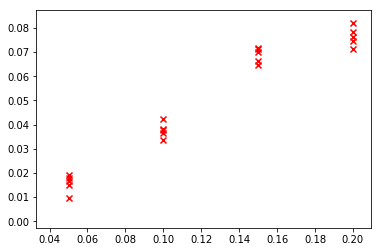

In [176]:
for i in range(5):
    plt.scatter(results_df.columns[0], result_df[0.05][i] ,marker='x', color='red')
    plt.scatter(results_df.columns[2], result_df[0.1][i] ,marker='x', color='red')
    plt.scatter(results_df.columns[4], result_df[0.15][i] ,marker='x', color='red')
    plt.scatter(results_df.columns[6], result_df[0.2][i] ,marker='x', color='red')

In [79]:
com  = pd.read_csv('eval/com_s1.csv')
command =np.array(com)
command.shape

(2000, 3)

In [82]:
IO('data/cmd_s1.pkl').to_pickle(command)


In [85]:
a = IO('data/cmd_s1.pkl').read_pickle()
a

array([[0.05 , 0.   , 0.   ],
       [0.05 , 0.   , 0.   ],
       [0.05 , 0.   , 0.   ],
       ...,
       [0.075, 0.   , 0.   ],
       [0.075, 0.   , 0.   ],
       [0.075, 0.   , 0.   ]])

In [ ]:
df = pd.DataFrame({'con1':a, 'con2':b}, index = [1])
df2 = pd.DataFrame({'con1':a, 'con2':b, 'con3':c}, index =[2])
pd.concat([df1, df2], axis=0, join='outer')

In [35]:
df = pd.DataFrame( )

In [47]:
a = np.array([1,2,3,4])  
b = np.array([10,11,12]) 
c = np.array([20,21,22]) 
pd.DataFrame({'con1':[1,2,3], 'con2':[10,11,12]})

,con1,con2
0,1,10
1,2,11
2,3,12


In [32]:
for i in range(10):
    print(i)
    df = pd.DataFrame(a)
    

0


ValueError: cannot set a row with mismatched columns

In [24]:
list(range(10))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]